## 목표
- 활성화 함수와 경사하강법 조합에 따른 성능 비교해보기
- keras의 fashion_mnist 데이터 활용

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 1. Sigmoid + SGD 조합
- 여기서 optimzer 객체들을 불러왔지만 여러 조합을 비교해보기 위해 디폴트 옵션만 설정함

In [ ]:
model1 = Sequential()

# 입력층
model1.add(InputLayer(input_shape=(28, 28)))

# 중간층
model1.add(Flatten())
model1.add(Dense(64, activation='sigmoid'))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense(256, activation='sigmoid'))
model1.add(Dense(128, activation='sigmoid'))

# 출력층
model1.add(Dense(10, activation='softmax'))

model1.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=['acc'])

h1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3133 - acc: 0.1074 - val_loss: 2.2992 - val_acc: 0.1878
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2976 - acc: 0.1314 - val_loss: 2.2969 - val_acc: 0.1037
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2938 - acc: 0.1396 - val_loss: 2.2916 - val_acc: 0.1008
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2895 - acc: 0.1613 - val_loss: 2.2868 - val_acc: 0.1030
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2843 - acc: 0.1769 - val_loss: 2.2814 - val_acc: 0.1925
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2776 - acc: 0.2315 - val_loss: 2.2735 - val_acc: 0.1917
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2684 - acc: 0.2571 - val_loss: 2.2640 - val_acc: 0.2000
Epoch 8/100
375/375 [==============================] - 2s 4ms/step - 

>sparse_categorical_crossentropy
- 다중 분류일때, 정답 데이터를 각 클래스의 확률값으로 맞추기 위해 원핫인코딩을 했음
- 위 과정처럼 정답 데이터를 인코딩을 안해도 다중 분류를 할 수 있는 loss가 sparse_categorical_crossentropy이다.


### 2. Relu + SGD 조합
- 옵티마이저는 SGD를 사용하기 때문에 중간층 끝부분만 sigmoid 적용
- relu는 0보다 크면 값을 그대로 전달함 (y = x)
- 층이 깊지 않기 때문에 relu만 적용하면 오차가 그대로 적용되서 학습이 잘 안될수도 있기 때문


In [ ]:
model2 = Sequential()

# 입력층
model2.add(InputLayer(input_shape=(28, 28)))

# 중간층
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='sigmoid'))

# 출력층
model2.add(Dense(10, activation='softmax'))

model2.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=['acc'])

h2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.9905 - acc: 0.7126 - val_loss: 0.6768 - val_acc: 0.7843
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6071 - acc: 0.8022 - val_loss: 0.5818 - val_acc: 0.8012
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5213 - acc: 0.8249 - val_loss: 0.5046 - val_acc: 0.8221
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4783 - acc: 0.8359 - val_loss: 0.4698 - val_acc: 0.8381
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4487 - acc: 0.8473 - val_loss: 0.4571 - val_acc: 0.8390
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4288 - acc: 0.8512 - val_loss: 0.4596 - val_acc: 0.8315
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4136 - acc: 0.8557 - val_loss: 0.4240 - val_acc: 0.8493
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - 

### 3. Relu + Adam 조합
- 이번엔 옵티마이저를 Adam을 사용하기 때문에 sigmoid를 중간에 추가할 필요가 없음
- Adam은 학습 방향 뿐만 아니라 스텝 사이즈(learning_rate)도 고려하기 때문
- Adam 역시 디폴트 옵션만 적용해봄

In [ ]:
model3 = Sequential()

# 입력층
model3.add(InputLayer(input_shape=(28, 28)))

# 중간층
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))

# 출력층
model3.add(Dense(10, activation='softmax'))

model3.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['acc'])

h3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128)

Epoch 1/100
375/375 [==============================] - 30s 3ms/step - loss: 1.3770 - acc: 0.7274 - val_loss: 0.6520 - val_acc: 0.7735
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5308 - acc: 0.8124 - val_loss: 0.5016 - val_acc: 0.8201
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4640 - acc: 0.8336 - val_loss: 0.4682 - val_acc: 0.8327
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4248 - acc: 0.8434 - val_loss: 0.4603 - val_acc: 0.8416
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3915 - acc: 0.8557 - val_loss: 0.4420 - val_acc: 0.8470
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3748 - acc: 0.8621 - val_loss: 0.4377 - val_acc: 0.8457
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3569 - acc: 0.8671 - val_loss: 0.4206 - val_acc: 0.8509
Epoch 8/100
375/375 [==============================] - 1s 3ms/step -

### 3개의 모델 결과 시각화

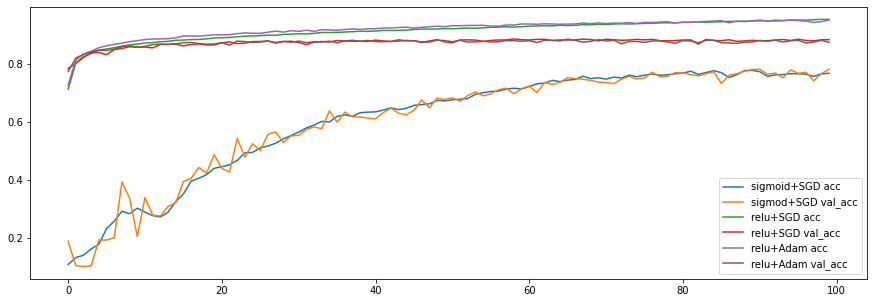

In [ ]:
plt.figure(figsize=(15, 5))

# sigmoid + SGD
plt.plot(h1.history['acc'], label='sigmoid+SGD acc')
plt.plot(h1.history['val_acc'], label='sigmod+SGD val_acc')

# relu + SGD
plt.plot(h2.history['acc'], label='relu+SGD acc')
plt.plot(h2.history['val_acc'], label='relu+SGD val_acc')

# relu + Adam
plt.plot(h3.history['acc'], label='relu+Adam acc')
plt.plot(h3.history['val_acc'], label='relu+Adam val_acc')

plt.legend()
plt.show()

- relu를 사용한 조합은 sigmoid에 비해 처음부터 높은 성능이 되는 것을 알 수 있음
- fashion 데이터는 어려운 편이 아니라서 SGD가 relu와 사용되도 곧 잘 최적화가 잘되는 걸 볼 수 있음

### 모델 저장 및 조기학습 중단
- 1회 epoch를 마무리하는 시간이 긴 경우가 많다.
- 지정된 횟수까지 기다리는 건 시간이 낭비되는 일이다.
- 모델이 과대적합 방향으로 흘러가서 학습이 마무리되면 그동안의 시간이 낭비되는 것이다.
- 중간중간에 모델을 저장하고, 학습이 더 이상 진행이 안될 경우 중단하는 기능 활용하기

#### 모델 저장(ModelCheckpoint)
- 모델 저장을 도와주는 기능
- 모델 저장 경로 설정
    - 모델명에 실행한 epoch수와 검증정확도 val_acc를 같이 명시해서 저장하기

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "./model/myModel_{epoch:02d}_{val_acc:.4f}.hd5"

>ModelCheckpoint
- monitor : loss값을 볼지, acc값을 볼지 설정 가능
- verbose : 로그 출력 여부
- save_best_only=True : 모델의 점수가 최고점을 돌파할때만 저장


In [ ]:
mkpt = ModelCheckpoint(filepath=model_path,
                       monitor='val_acc',
                       verbose=1,
                       save_best_only=True)

#### 조기 학습 중단(EarlyStopping)
- 모델 학습을 조기에 중단하는 기능
- monitor : 어떤 값을 기준으로 중단시킬지(val_loss, val_acc)
- verbose : 로그 출력 여부
- patience : 성능 저하를 몇번 지켜볼지 설정, 중간에 성능 개선이 일어나면 patience 횟수 다시 초기화

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_acc',
                      verbose=1,
                      patience=5)

#### ModelCheckpoint, EarlyStopping 적용
- 모델 학습 단계에서 callbacks 옵션 추가하면 됨
- callbacks=[ModelCheckpoint, EarlyStopping]

##### 기본 sigmoid + SGD로 Sequential 모델을 설계, patience를 5로 조기중단 설정

In [ ]:
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=(28, 28)))

# 중간층
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))

# 출력층
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=0.01), metrics=['acc'])

h = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128,
              callbacks=[mkpt, early])

Epoch 1/100
375/375 [==============================] - ETA: 0s - loss: 2.3080 - acc: 0.1090
Epoch 1: val_acc improved from -inf to 0.10000, saving model to ./model/myModel_01_0.1000.hd5
375/375 [==============================] - 2s 5ms/step - loss: 2.3080 - acc: 0.1090 - val_loss: 2.3000 - val_acc: 0.1000
Epoch 2/100
356/375 [===========================>..] - ETA: 0s - loss: 2.2978 - acc: 0.1243
Epoch 2: val_acc improved from 0.10000 to 0.10125, saving model to ./model/myModel_02_0.1013.hd5
375/375 [==============================] - 2s 5ms/step - loss: 2.2977 - acc: 0.1259 - val_loss: 2.2959 - val_acc: 0.1013
Epoch 3/100
368/375 [============================>.] - ETA: 0s - loss: 2.2943 - acc: 0.1423
Epoch 3: val_acc did not improve from 0.10125
375/375 [==============================] - 1s 3ms/step - loss: 2.2943 - acc: 0.1418 - val_loss: 2.2929 - val_acc: 0.1003
Epoch 4/100
371/375 [============================>.] - ETA: 0s - loss: 2.2907 - acc: 0.1653
Epoch 4: val_acc improved from 0

- val_acc에서 5번이나 성능 개선이 일어나지 않아서 모델 학습이 조기중단됨을 확인할 수 있다.
- 현재 16 epoch만큼 학습된 model이 지정된 경로에 저장